# Homework 2

**For exercises in the week 20-25.11.19**

**Points: 6 + 1b**

Please solve the problems at home and bring to class a [declaration form](http://ii.uni.wroc.pl/~jmi/Dydaktyka/misc/kupony-klasyczne.pdf) to indicate which problems you are willing to present on the blackboard.



### Declartation

| Exercise || 1 | 2 | 3 | 4 |  5  | 6 | 7 | 8 |
|----------||---|---|---|---| --- |---|---|---|
| Points   ||   | 1 |   | 1 | 0.5 |   | 1 |   |

## Problem 1 [1p]

Let $(x^{(i)},y^{(i)})$ be a data sample with $x^{(i)}\in\mathbb{R}^D$, $y^{(i)}\in\mathbb{R}$. Let $\Theta \in\mathbb{R}^D$ a parameter vector.

Find the closed form solution $\Theta^*$ to 

$$
\min_\Theta \left(\frac{1}{2}\sum_i (\Theta^Tx^{(i)} - y^{(i)})^2 + \frac{\lambda}{2}\sum_{d=1}^D \Theta_d^2\right).
$$

## Problem 2 [1p]
Let $v\in\mathbb{R}^D$ be a vector. Define the gradient of $f(v)\in\mathbb{R}$ with respect to $v$ to be $\frac{\partial f}{\partial v} = \left[\frac{\partial f(v)}{\partial v_1}, \frac{\partial f(v)}{\partial v_2}, ..., \frac{\partial f(v)}{\partial v_D}\right]$

Find the following functions' gradients with respect to vector $[x, y, z]^T$:
1. $f_1([x, y, z]^T) = x + y$
2. $f_2([x, y, z]^T) = xy$
3. $f_3([x, y, z]^T) = x^2y^2$
4. $f_4([x, y, z]^T) = (x + y)^2$
5. $f_5([x, y, z]^T) = x^4 + x^2 y z + x y^2 z + z^4$
6. $f_6([x, y, z]^T) = e^{x + 2y}$
7. $f_7([x, y, z]^T) = \frac{1}{x y^2}$
8. $f_8([x, y, z]^T) = ax + by + c$
9. $f_9([x, y, z]^T) = \tanh(ax + by + c)$

### Ans:
1. [1, 1, 0]
2. [y, x, 0]
3. [$2y^2x$, $2x^2y$, 0]
4. [$2x + 2y$, $2x + 2y$, 0] 
5. [$4x^3 +2yzx +y^2z$, $2xzy + zx^2$, $3x^4 + x^2y + xy^2$]
6. [$e^{x + 2y}$, $2e^{x + 2y}$, 0]
7. [$-\frac{1}{y^2x^2}$, $-\frac{2}{xy^3}$, 0]
8. [$a$, $b$, 0]
9. [$a*sech^2(ax + by + c)$, $b*sech^2(ax + by + c)$, 0]

## Problem 3 [0.5p]

Find the following functions' gradients or Jacobians with respect to vector $\mathbf{x}$, where $\mathbf{x}, \mathbf{b} \in \mathbb{R}^{n}$, $\mathbf{W} \in \mathbb{R}^{n \times n}$:

1. $\mathbf{W} \mathbf{x} + \mathbf{b}$
2. $\mathbf{x}^T \mathbf{W} \mathbf{x}$,

## Problem 4 [1p]

Find the derivative of
$-\log(S(\mathbf{x})_j)$, where $S$ is the
    softmax function
    (https://en.wikipedia.org/wiki/Softmax_function) and we are
    interested in the derivative over the $j$-th output of the
    Softmax.

### Ans:
$$
(-log(S(x_j)))' = - \frac{1}{S(x_j)} * S'(x_j) = - \frac{1}{S(x_j)} * (\frac{e^{x_j}}{\sum_i e^{x_i}})' = 
$$

$$
= - \frac{1}{S(x_j)} * \frac{(e^{x_j})' * (\sum_i e^{x_i}) - e^{x_j} * (\sum_i e^{x_i})'}{(\sum_i e^{x_i})^2} =
$$

$$
= - \frac{\sum_i e^{x_i}}{e^{x_j}} * \frac{e^{x_j} * \sum_i e^{x_i} - e^{x_j} * e^{x_j}}{(\sum_i e^{x_i})^2} =
$$

$$
= \frac{\sum_i e^{x_i} - e^{x_j}}{\sum_i e^{x_i}} = S(x_j) - 1
$$

## Problem 5 [0.5p]

Consider a dataset with 400 examples of class C1 and 400 of class C2. 
Let tree A have 2 leaves with class distributions:

| Tree A   | C1    | C2  |
|----------|-------|-----|
| Leaf 1   | 100   | 300 |
| Leaf 2   | 300   | 100 |

and let tree B have 2 leaves with class distribution:

| Tree B   | C1    | C2  |
|----------|-------|-----|
| Leaf 1   | 200   | 400 |
| Leaf 2   | 200   |   0 |

What is the misclassification rate for both trees? Which tree is more pure according to Gini or Infogain?

### Ans:

In [1]:
# misclassification rate: 
1/2*1/4 + 1/2 * 1/4, 1/2 * 1/2 + 1/2 * 0 

(0.25, 0.25)

In [6]:
import pandas as pd
import numpy as np
def entropy(counts):
    _sum = np.sum(counts.values, axis=0)
    return -np.sum(counts/_sum * np.log2(counts/_sum), axis=0)

def gini(counts):
#     print(type(counts))
#     print(counts)
    _sum = np.sum(counts.values, axis=0)
    return np.sum(counts/_sum * (1 - counts/_sum), axis=0)

def mean_err_rate(counts):
    _sum = np.sum(counts.values, axis=0)
    return np.min(counts/_sum, axis=0)


data1 = pd.DataFrame.from_dict({"c1": [100,300], "c2": [300,100]}).transpose()
data2 = pd.DataFrame.from_dict({"c1": [200,200], "c2": [400,0]}).transpose()

np.average(gini(data1)), np.average(gini(data2), weights=[2/3, 1/3])

(0.375, 0.2962962962962963)

In [7]:
np.average(entropy(data1)), np.average(entropy(data2), weights=[2/3, 1/3])

/Users/michal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log2
  """


(0.8112781244591328, 0.612197222702993)

## Problem 6 [1p]

Consider regresion problem, with $M$ predictors $h_m(x)$ trained to aproximate a target $y$. Define the error to be $\epsilon_m(x) = h_m(x) - y$.

Suppose you train $M$ independent classifiers with average least squares error
$$
E_{AV} = \frac{1}{M}\sum_{m=1}^M \mathbb{E}_{x}[\epsilon_m(x)^2].
$$

Further assume that the errors have zero mean and are uncorrelated:
$$
\mathbb{E}_{x}[\epsilon_m(x)] = 0\qquad\text{ and }\qquad\mathbb{E}_{x}[\epsilon_m(x)\epsilon_l(x)] = 0\text{ for } m \neq l
$$

Let the mean predictor be
$$
h_M(x) = \frac{1}{M}h_m(x).
$$

What is the average error of $h_M(x)$?

## Problem 7 [1p]

Suppose you work on a binary classification problem and train 3 weak classifiers. You combine their prediction by voting. 

Can the training error rate of the voting ensemble smaller that the error rate of the individual weak predictors? Can it be larger? Show an example or prove infeasibility.

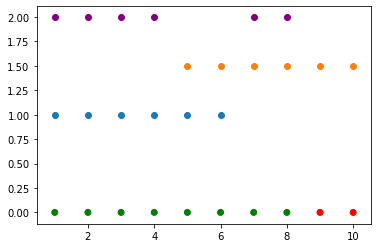

In [11]:
import numpy as np
import matplotlib.pyplot as plt
A = np.arange(1,7)
B = np.arange(5,11)
C = np.hstack([np.arange(1,5),[7,8]])
Res = np.arange(1, 11)
ResC = ['g'] * 8  + ['r'] * 2 
plt.scatter(A, A*0+1)
plt.scatter(B, B*0+1.5)
plt.scatter(C, C*0+2, c='purple')
plt.scatter(Res, Res*0, c=ResC )


### 3*60% -> 80%

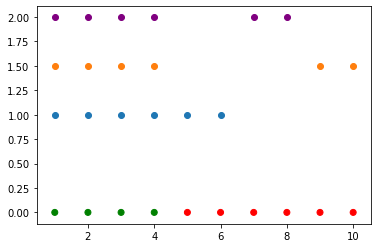

In [14]:
import numpy as np
import matplotlib.pyplot as plt
A = np.arange(1,7)
B = np.hstack([np.arange(1,5),[9,10]])
C = np.hstack([np.arange(1,5),[7,8]])
Res = np.arange(1, 11)
ResC = ['g'] * 4  + ['r'] * 6
plt.scatter(A, A*0+1)
plt.scatter(B, B*0+1.5)
plt.scatter(C, C*0+2, c='purple')
plt.scatter(Res, Res*0, c=ResC )


### 3*60% -> 40%

## Problem 8 [1 bonus point]

While on a walk, you notice that a locomotive has the serial number 50. Assuming that all locomotives used by PKP (the Polish railroad operator) are numbered using consecutive natural numbers, what is your estimate of $N$ the total number of locomotives operated by PKP?

Tell why the Maximum Likelihood principle may not yield satisfactory results. 

Use the Bayesian approach to find the posterior distribution over
  the number of locomotives. Then compute the expected count of
  locomotives. For the prior use the power law:
  \begin{equation}
  p(N) =  \frac{1}{N^\alpha}\frac{1}{\zeta(\alpha,1)},
  \end{equation}
  where the $\zeta(s,q)=\sum_{n=0}^{\infty}\frac{1}{(q+n)^s}$ is the
  Hurwitz Zeta function
  (https://en.wikipedia.org/wiki/Hurwitz_zeta_function)
  available in Python as `scipy.special.zeta`. The use of the
  power law is motivated by the observation that the frequency of
  occurrence of a company is inversely proportional to its size (see
  also: R.L. Axtell, Zipf distribution of US firm sizes
  https://www.sciencemag.org/content/293/5536/1818).
  
  How would your estimate change after seeing 5 locomotives, with the
  biggest serial number among them being 50?

  **Note**: During the Second World War, a similar problem was
  encountered while trying to estimate the total German tank
  production from the serial numbers of captured machines. The
  statistical estimates were the most precise!